In [353]:
import numpy as np
from MountainCarEnv import MountainCarEnv
import matplotlib.pyplot as plot

In [354]:
env = MountainCarEnv(render_mode="rbg_array")

In [355]:
pos_space = np.linspace(env.min_position, env.max_position, 20)
vel_space = np.linspace(-env.max_speed, env.max_speed, 20)
Q = np.zeros((len(pos_space), len(vel_space), env.action_space.n))


In [356]:
def max_action(state, Q):
    values = np.array(Q[state, a] for a in range(env.action_space.n))
    action = np.argmax(values)
    return action

def epsilon_greedy_policy(state, Q, epsilon):
    explore = np.random.binomial(1, epsilon)
    if explore:
        action = env.action_space.sample()
    else:
        action = max_action(state, Q)
    return action

def get_state(obs):
    pos, vel = obs
    pos_bin = np.digitize(pos, pos_space)
    vel_bin = np.digitize(vel, vel_space)
    return pos_bin, vel_bin

def run_mountain_car(Q, epsilon, alpha, gamma):
    done = False
    totalReward = 0
    obs = env.reset()
    state = get_state(obs)
    while not done:
        action = epsilon_greedy_policy(state, Q, epsilon)
        obs, reward, done, _ = env.step(action)
        totalReward += reward
        newState = get_state(obs)
        newAction = max_action(newState, Q)
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[newState, newAction] - Q[state, action])
        state = newState
        
    return totalReward



In [357]:
total_Q = []
learning_rewards = []
num_episodes = 20000
epsilon=1
alpha=0.1
gamma=0.99

for i in range(num_episodes):
    totalReward = run_mountain_car(Q, epsilon, alpha, gamma)
    epsilon = epsilon - 2/num_episodes if epsilon > 0.1 else 0.1
    learning_rewards.append(totalReward)
    total_Q.append(np.mean(Q))
    if (i+1) % 1000 == 0:
        print(f"Episode {i+1} out of {num_episodes}")



Episode 1000 out of 20000
Episode 2000 out of 20000
Episode 3000 out of 20000
Episode 4000 out of 20000
Episode 5000 out of 20000
Episode 6000 out of 20000
Episode 7000 out of 20000
Episode 8000 out of 20000
Episode 9000 out of 20000
Episode 10000 out of 20000
Episode 11000 out of 20000
Episode 12000 out of 20000
Episode 13000 out of 20000
Episode 14000 out of 20000
Episode 15000 out of 20000
Episode 16000 out of 20000
Episode 17000 out of 20000
Episode 18000 out of 20000
Episode 19000 out of 20000
Episode 20000 out of 20000


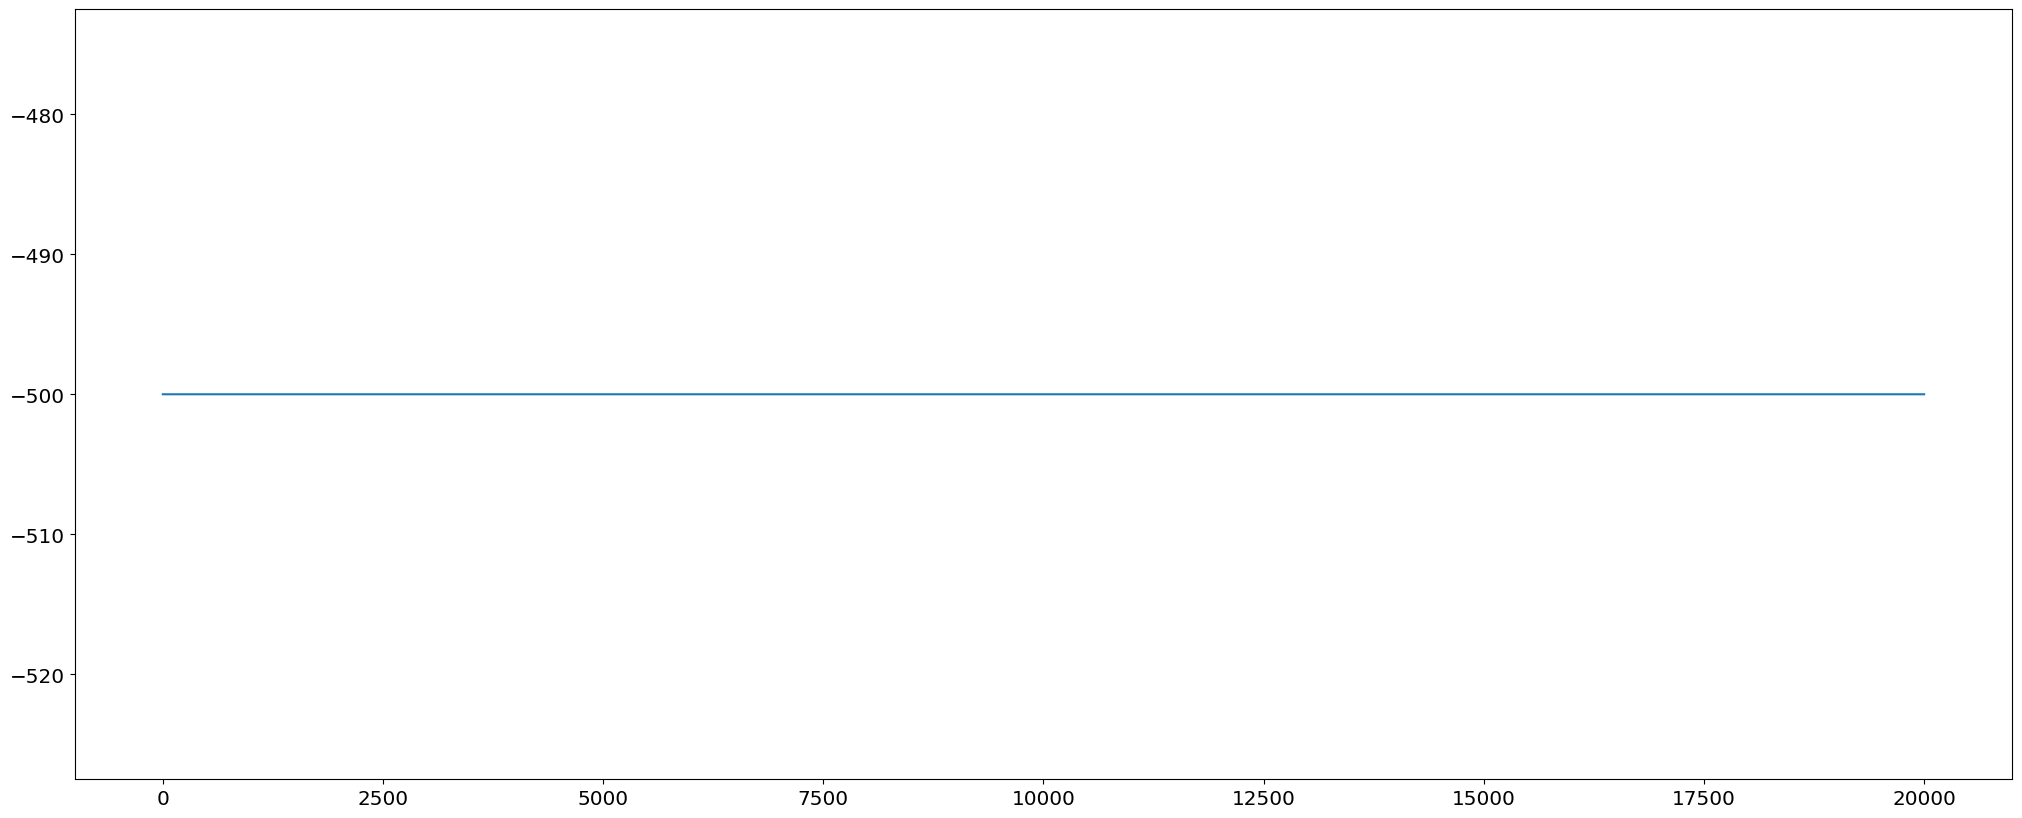

In [358]:
# Plot learing rewards
plot.plot(list(range(1, len(learning_rewards) + 1)), learning_rewards)
plot.show()        

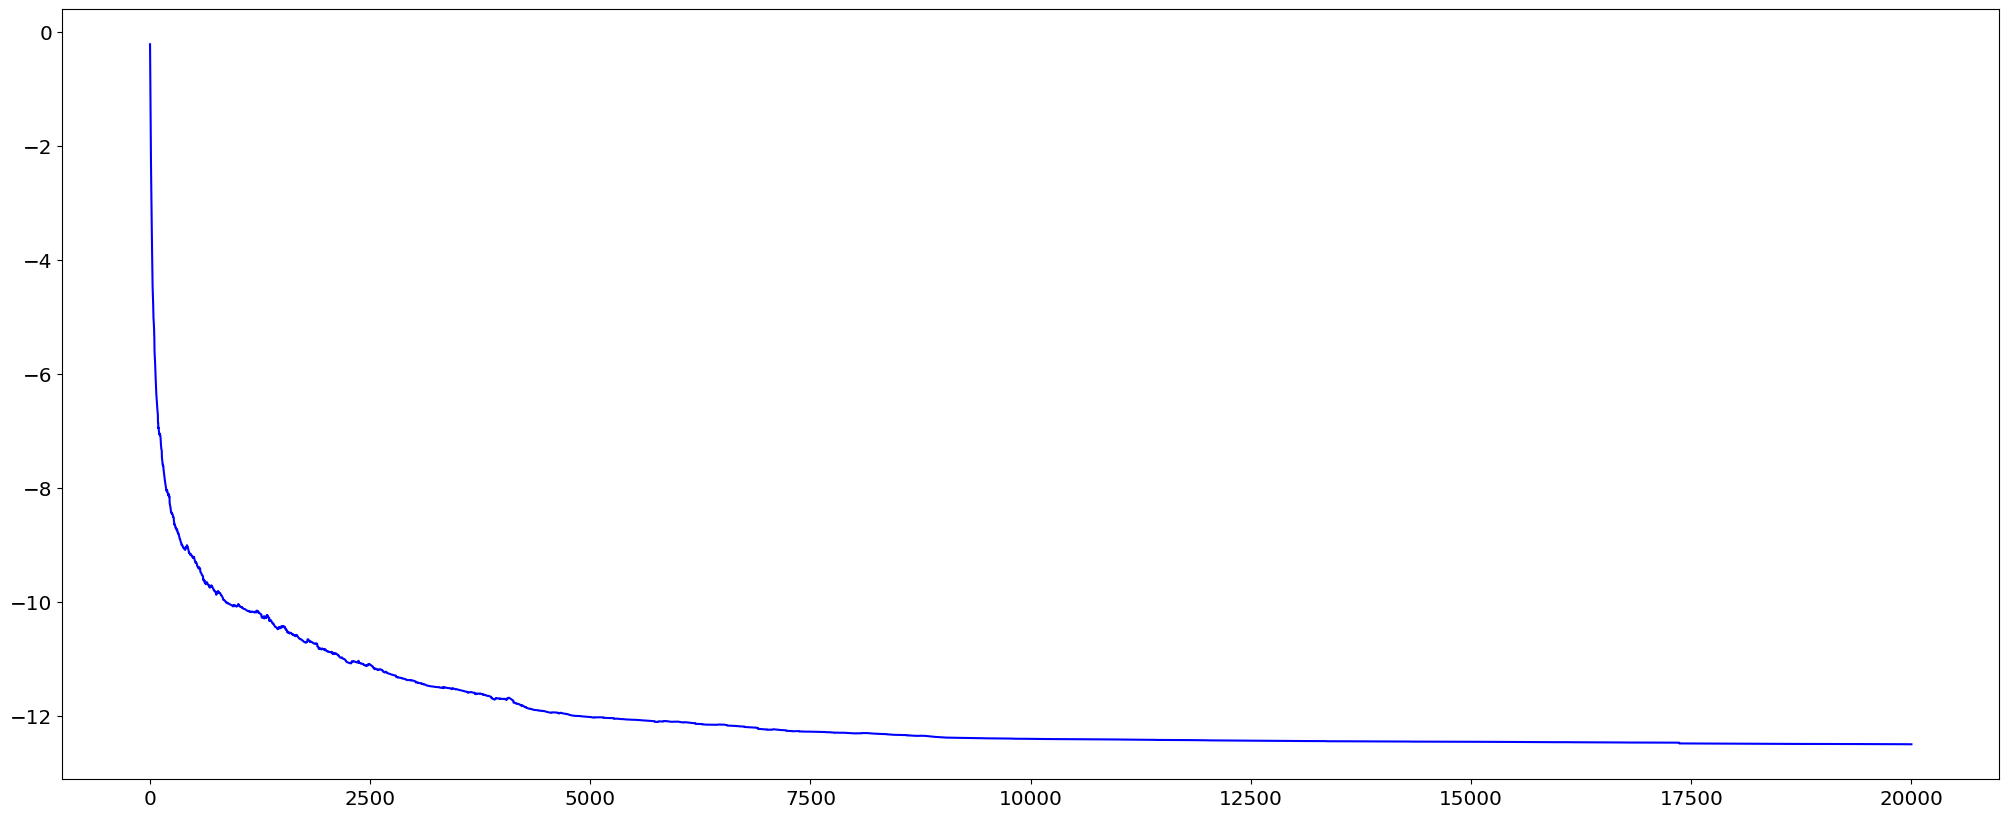

In [359]:
# Plot Q
plot.plot(list(range(1, len(total_Q) + 1)), total_Q, color='blue')
plot.show()
